In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/Colab Notebooks/Avoccado price prediction/avocado.csv')

Mounted at /content/drive


In [3]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df = df.drop('region', axis=1)

In [5]:
df.type = df.type.map({'conventional':1,'organic':2})

In [6]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018


In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
dtype: int64

In [8]:
#albany_df = df[df['region'] == 'Albany']
#albany_df

In [9]:
# Select features and target variable
X = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']]
y = df['AveragePrice']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train.shape

(14599, 10)

In [13]:
X_test.shape

(3650, 10)

In [14]:
y_train.shape

(14599,)

In [15]:
y_test.shape

(3650,)

# **1. Linear Regression**

In [16]:
# Create a linear regression model
model1 = LinearRegression()

In [17]:
y_train.head()

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
Name: AveragePrice, dtype: float64

In [18]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the test set
pred1 = model1.predict(X_test)

In [20]:
# Calculate evaluation metrics
rmse1 = np.sqrt(mean_squared_error(y_test, pred1))
mae1 = mean_absolute_error(y_test, pred1)
mape1 = mean_absolute_percentage_error(y_test, pred1)
accuracy1 = accuracy_score(y_test > pred1, y_test > pred1.round())
precision1 = precision_score(y_test > pred1, y_test > pred1.round())
confusion1 = confusion_matrix(y_test > pred1, y_test > pred1.round())
recall1 = recall_score(y_test > pred1, y_test > pred1.round())
f11 = f1_score(y_test > pred1, y_test > pred1.round())

In [21]:
# Print the evaluation metrics
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Confusion Matrix:\n", confusion1)
print("Recall:", recall1)
print("F1 Score:", f11)

RMSE: 0.31242583681263464
MAE: 0.24097655032677062
MAPE: 0.18340757409372377
Accuracy: 0.7194520547945206
Precision: 0.7214150347441567
Confusion Matrix:
 [[1484  441]
 [ 583 1142]]
Recall: 0.6620289855072464
F1 Score: 0.690447400241838


**## 2. SVR**

In [22]:
from sklearn.svm import SVR

In [23]:
# Create an SVR model
model2 = SVR()

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [26]:
# Make predictions on the test set
pred2 = model2.predict(X_test)


In [27]:
# Calculate evaluation metrics
rmse2 = np.sqrt(mean_squared_error(y_test, pred2))
mae2 = mean_absolute_error(y_test, pred2)
mape2 = mean_absolute_percentage_error(y_test, pred2)
accuracy2 = accuracy_score(y_test > pred2, y_test > pred2.round())
precision2 = precision_score(y_test > pred2, y_test > pred2.round())
confusion2 = confusion_matrix(y_test > pred2, y_test > pred2.round())
recall2 = recall_score(y_test > pred2, y_test > pred2.round())
f12 = f1_score(y_test > pred2, y_test > pred2.round())

In [28]:
# Print the evaluation metrics
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Confusion Matrix:\n", confusion2)
print("Recall:", recall2)
print("F1 Score:", f12)

RMSE: 0.3270574201522785
MAE: 0.249918196120409
MAPE: 0.18388373974039715
Accuracy: 0.6164383561643836
Precision: 0.6097992916174735
Confusion Matrix:
 [[1217  661]
 [ 739 1033]]
Recall: 0.5829571106094809
F1 Score: 0.5960761684939412


## 3. Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest model
model3 = RandomForestRegressor()

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
# Make predictions on the test set
pred3 = model3.predict(X_test)

In [33]:
# Calculate evaluation metrics
rmse3 = np.sqrt(mean_squared_error(y_test, pred3))
mae3 = mean_absolute_error(y_test, pred3)
mape3 = mean_absolute_percentage_error(y_test, pred3)
accuracy3 = accuracy_score(y_test > pred3, y_test > pred3.round())
precision3 = precision_score(y_test > pred3, y_test > pred3.round())
confusion3 = confusion_matrix(y_test > pred3, y_test > pred3.round())
recall3 = recall_score(y_test > pred3, y_test > pred3.round())
f13 = f1_score(y_test > pred3, y_test > pred3.round())

In [34]:
# Print the evaluation metrics
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Confusion Matrix:\n", confusion3)
print("Recall:", recall3)
print("F1 Score:", f13)

RMSE: 0.1780144976472499
MAE: 0.12343465753424655
MAPE: 0.09028586121144848
Accuracy: 0.630958904109589
Precision: 0.5990491283676703
Confusion Matrix:
 [[1169  759]
 [ 588 1134]]
Recall: 0.6585365853658537
F1 Score: 0.6273858921161826


## 4. Gradient Boosting Models (GBM)

In [35]:
import xgboost as xgb
# Create an XGBoost model
model4 = xgb.XGBRegressor()

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Train the model
model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
# Make predictions on the test set
pred4 = model4.predict(X_test)

In [39]:
# Calculate evaluation metrics
rmse4 = np.sqrt(mean_squared_error(y_test, pred4))
mae4 = mean_absolute_error(y_test, pred4)
mape4 = mean_absolute_percentage_error(y_test, pred4)
accuracy4 = accuracy_score(y_test > pred4, y_test > pred4.round())
precision4 = precision_score(y_test > pred4, y_test > pred4.round())
confusion4 = confusion_matrix(y_test > pred4, y_test > pred4.round())
recall4 = recall_score(y_test > pred4, y_test > pred4.round())
f14 = f1_score(y_test > pred4, y_test > pred4.round())

In [40]:
# Print the evaluation metrics
print("RMSE:", rmse4)
print("MAE:", mae4)
print("MAPE:", mape4)
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Confusion Matrix:\n", confusion4)
print("Recall:", recall4)
print("F1 Score:", f14)

RMSE: 0.1918570981092815
MAE: 0.1370328536265517
MAPE: 0.10080973434003537
Accuracy: 0.6465753424657534
Precision: 0.6285566476978789
Confusion Matrix:
 [[1145  718]
 [ 572 1215]]
Recall: 0.6799104644655848
F1 Score: 0.6532258064516129


## 5. Extreme Gradient Boosting (XGBoost)

In [41]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# Make predictions on the test set
pred5 = model5.predict(X_test)

In [45]:
# Calculate evaluation metrics
rmse5 = np.sqrt(mean_squared_error(y_test, pred5))
mae5 = mean_absolute_error(y_test, pred5)
mape5 = mean_absolute_percentage_error(y_test, pred5)
accuracy5 = accuracy_score(y_test > pred5, y_test > pred5.round())
precision5 = precision_score(y_test > pred5, y_test > pred5.round())
confusion5 = confusion_matrix(y_test > pred5, y_test > pred5.round())
recall5 = recall_score(y_test > pred5, y_test > pred5.round())
f15 = f1_score(y_test > pred5, y_test > pred5.round())

In [46]:
# Print the evaluation metrics
print("RMSE:", rmse5)
print("MAE:", mae5)
print("MAPE:", mape5)
print("Accuracy:", accuracy5)
print("Precision:", precision5)
print("Confusion Matrix:\n", confusion5)
print("Recall:", recall5)
print("F1 Score:", f15)

RMSE: 0.1918570981092815
MAE: 0.1370328536265517
MAPE: 0.10080973434003537
Accuracy: 0.6465753424657534
Precision: 0.6285566476978789
Confusion Matrix:
 [[1145  718]
 [ 572 1215]]
Recall: 0.6799104644655848
F1 Score: 0.6532258064516129


## 6. AdaBoostRegressor

In [47]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoost model
model6 = AdaBoostRegressor()

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [50]:
# Make predictions on the test set
pred6 = model6.predict(X_test)

In [51]:
# Calculate evaluation metrics
rmse6 = np.sqrt(mean_squared_error(y_test, pred6))
mae6 = mean_absolute_error(y_test, pred6)
mape6 = mean_absolute_percentage_error(y_test, pred6)
accuracy6 = accuracy_score(y_test > pred6, y_test > pred6.round())
precision6 = precision_score(y_test > pred6, y_test > pred6.round())
confusion6 = confusion_matrix(y_test > pred6, y_test > pred6.round())
recall6 = recall_score(y_test > pred6, y_test > pred6.round())
f16 = f1_score(y_test > pred6, y_test > pred6.round())

In [52]:
# Print the evaluation metrics
print("RMSE:", rmse6)
print("MAE:", mae6)
print("MAPE:", mape6)
print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Confusion Matrix:\n", confusion6)
print("Recall:", recall6)
print("F1 Score:", f16)

RMSE: 0.2872710110762182
MAE: 0.2300662171330727
MAPE: 0.181358478951377
Accuracy: 0.7158904109589042
Precision: 0.5870755750273823
Confusion Matrix:
 [[1541  754]
 [ 283 1072]]
Recall: 0.7911439114391144
F1 Score: 0.6740018861993085


## 7. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree model
model7 = DecisionTreeRegressor()

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
# Make predictions on the test set
pred7 = model7.predict(X_test)

In [57]:
# Calculate evaluation metrics
rmse7 = np.sqrt(mean_squared_error(y_test, pred7))
mae7 = mean_absolute_error(y_test, pred7)
mape7 = mean_absolute_percentage_error(y_test, pred7)
accuracy7 = accuracy_score(y_test > pred7, y_test > pred7.round())
precision7 = precision_score(y_test > pred7, y_test > pred7.round())
confusion7 = confusion_matrix(y_test > pred7, y_test > pred7.round())
recall7 = recall_score(y_test > pred7, y_test > pred7.round())
f17 = f1_score(y_test > pred7, y_test > pred7.round())


In [58]:
# Print the evaluation metrics
print("RMSE:", rmse7)
print("MAE:", mae7)
print("MAPE:", mape7)
print("Accuracy:", accuracy7)
print("Precision:", precision7)
print("Confusion Matrix:\n", confusion7)
print("Recall:", recall7)
print("F1 Score:", f17)

RMSE: 0.24765536150503947
MAE: 0.15773424657534246
MAPE: 0.11399566698594617
Accuracy: 0.6627397260273973
Precision: 0.6253340459647247
Confusion Matrix:
 [[1249  701]
 [ 530 1170]]
Recall: 0.6882352941176471
F1 Score: 0.6552786334360123


## 8. KNeighborsRegressor(KNN)

In [59]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN model
model8 = KNeighborsRegressor()

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [62]:
# Make predictions on the test set
pred8 = model8.predict(X_test)

In [63]:
# Calculate evaluation metrics
rmse8 = np.sqrt(mean_squared_error(y_test, pred8))
mae8 = mean_absolute_error(y_test, pred8)
mape8 = mean_absolute_percentage_error(y_test, pred8)
accuracy8 = accuracy_score(y_test > pred8, y_test > pred8.round())
precision8 = precision_score(y_test > pred8, y_test > pred8.round())
confusion8 = confusion_matrix(y_test > pred8, y_test > pred8.round())
recall8 = recall_score(y_test > pred8, y_test > pred8.round())
f18 = f1_score(y_test > pred8, y_test > pred8.round())

In [64]:
# Print the evaluation metrics
print("RMSE:", rmse8)
print("MAE:", mae8)
print("MAPE:", mape8)
print("Accuracy:", accuracy8)
print("Precision:", precision8)
print("Confusion Matrix:\n", confusion8)
print("Recall:", recall8)
print("F1 Score:", f18)

RMSE: 0.2442992931990067
MAE: 0.17341424657534246
MAPE: 0.12795268119284575
Accuracy: 0.6824657534246575
Precision: 0.6347177848775293
Confusion Matrix:
 [[1299  686]
 [ 473 1192]]
Recall: 0.715915915915916
F1 Score: 0.672876093705899


## 9. Artificial Neural Networks (ANN)

In [65]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [68]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [70]:
# Make predictions on the test set
pred9 = model9.predict(X_test_scaled).flatten()

115/115 [==============================] - 0s 2ms/step


In [71]:
# Calculate evaluation metrics
rmse9 = np.sqrt(mean_squared_error(y_test, pred9))
mae9 = mean_absolute_error(y_test, pred9)
mape9 = mean_absolute_percentage_error(y_test, pred9)
accuracy9 = accuracy_score(y_test > pred9, y_test > pred9.round())
precision9 = precision_score(y_test > pred9, y_test > pred9.round())
confusion9 = confusion_matrix(y_test > pred9, y_test > pred9.round())
recall9 = recall_score(y_test > pred9, y_test > pred9.round())
f19 = f1_score(y_test > pred9, y_test > pred9.round())


In [72]:
# Print the evaluation metrics
print("RMSE:", rmse9)
print("MAE:", mae9)
print("MAPE:", mape9)
print("Accuracy:", accuracy9)
print("Precision:", precision9)
print("Confusion Matrix:\n", confusion9)
print("Recall:", recall9)
print("F1 Score:", f19)

RMSE: 0.27064892382427447
MAE: 0.20351590695250527
MAPE: 0.1492625298234909
Accuracy: 0.7084931506849315
Precision: 0.6927645788336934
Confusion Matrix:
 [[1303  569]
 [ 495 1283]]
Recall: 0.7215973003374578
F1 Score: 0.7068870523415979


## 10. LSTM(Long Short term Memory)

In [73]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [76]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


In [77]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [78]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_test_reshaped).flatten()

114/114 [==============================] - 1s 4ms/step


In [80]:
# Calculate evaluation metrics
rmse10 = np.sqrt(mean_squared_error(y_test[n_steps-1:], y_pred))
mae10 = mean_absolute_error(y_test[n_steps-1:], y_pred)
mape10 = mean_absolute_percentage_error(y_test[n_steps-1:], y_pred)
accuracy10 = accuracy_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
precision10 = precision_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
recall10 = recall_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
f110 = f1_score(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())
confusion10 = confusion_matrix(y_test[n_steps-1:] > y_pred, y_test[n_steps-1:] > y_pred.round())


In [81]:
# Print evaluation metrics
print("RMSE:", rmse10)
print("MAE:", mae10)
print("MAPE:", mape10)
print("Accuracy:", accuracy10)
print("Precision:", precision10)
print("Recall:", recall10)
print("F1 Score:", f110)
print("Confusion Matrix:\n", confusion10)

RMSE: 0.3050151496681672
MAE: 0.2291683292362723
MAPE: 0.16973246932750088
Accuracy: 0.6959626476242791
Precision: 0.6979405034324943
Recall: 0.6781545302946081
F1 Score: 0.6879052720608966
Confusion Matrix:
 [[1314  528]
 [ 579 1220]]


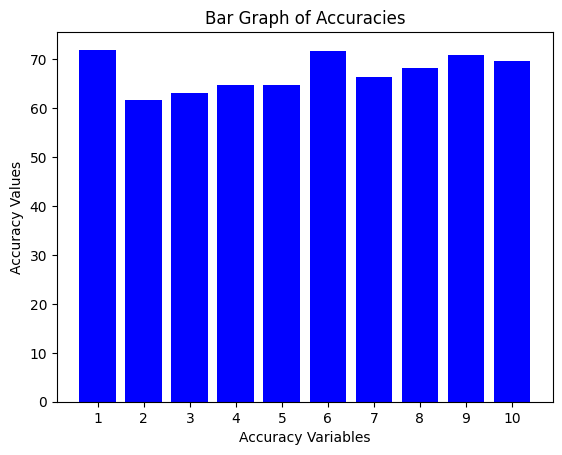

In [82]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracies from accuracy1 to accuracy10
accuracies = [accuracy1*100, accuracy2*100, accuracy3*100, accuracy4*100, accuracy5*100, accuracy6*100, accuracy7*100, accuracy8*100, accuracy9*100, accuracy10*100]

# List of corresponding labels for each accuracy
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, accuracies, color='blue')
plt.xlabel('Accuracy Variables')
plt.ylabel('Accuracy Values')
plt.title('Bar Graph of Accuracies')
plt.show()


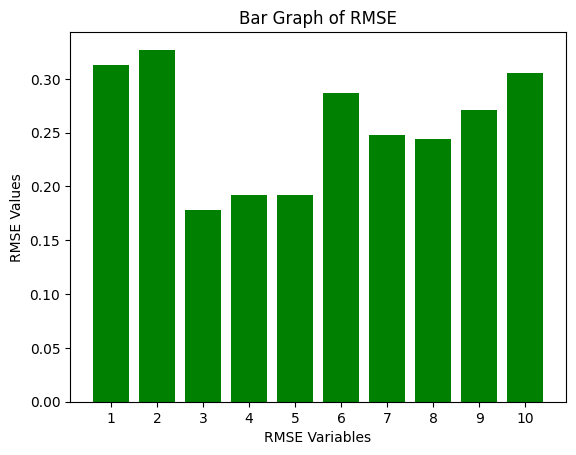

In [83]:
import matplotlib.pyplot as plt

# Assuming you have a list of RMSE values from rmse1 to rmse10
rmse_values = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7, rmse8, rmse9, rmse10]

# List of corresponding labels for each RMSE value
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, rmse_values, color='green')
plt.xlabel('RMSE Variables')
plt.ylabel('RMSE Values')
plt.title('Bar Graph of RMSE')
plt.show()


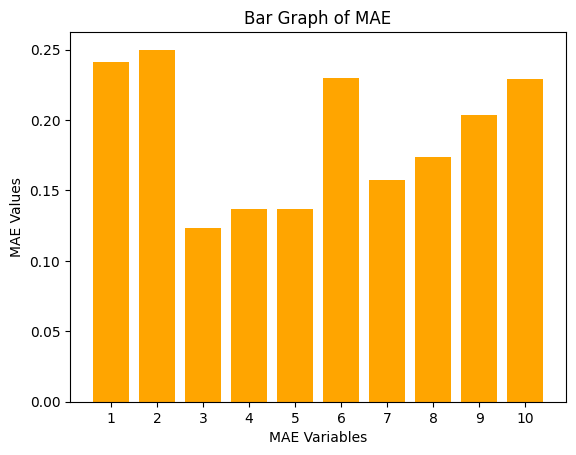

In [84]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAE values from mae1 to mae10
mae_values = [mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10]

# List of corresponding labels for each MAE value
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, mae_values, color='orange')
plt.xlabel('MAE Variables')
plt.ylabel('MAE Values')
plt.title('Bar Graph of MAE')
plt.show()


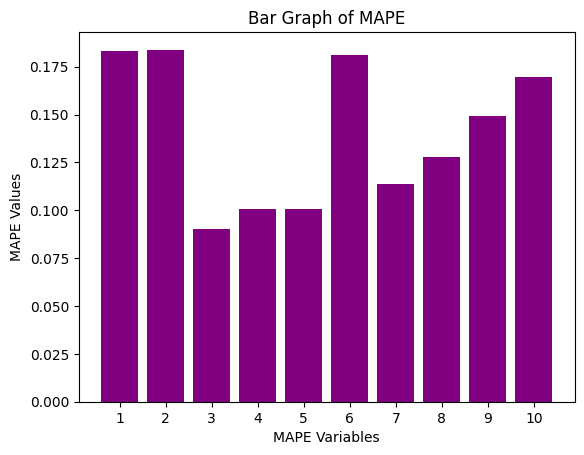

In [85]:
import matplotlib.pyplot as plt

# Assuming you have a list of MAPE values from mape1 to mape10
mape_values = [mape1, mape2, mape3, mape4, mape5, mape6, mape7, mape8, mape9, mape10]

# List of corresponding labels for each MAPE value
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, mape_values, color='purple')
plt.xlabel('MAPE Variables')
plt.ylabel('MAPE Values')
plt.title('Bar Graph of MAPE')
plt.show()


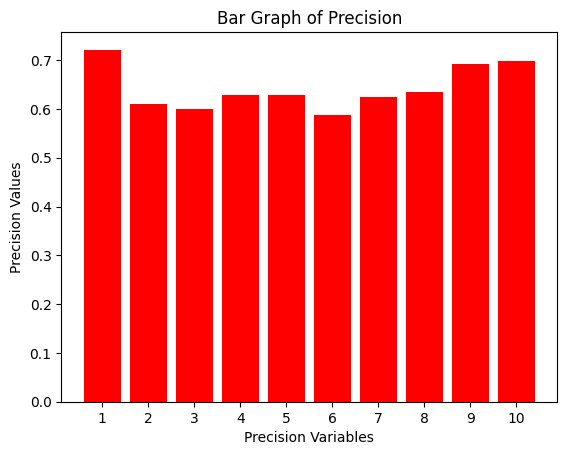

In [86]:
import matplotlib.pyplot as plt

# Assuming you have a list of precision values from precision1 to precision10
precision_values = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]

# List of corresponding labels for each precision value
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, precision_values, color='red')
plt.xlabel('Precision Variables')
plt.ylabel('Precision Values')
plt.title('Bar Graph of Precision')
plt.show()


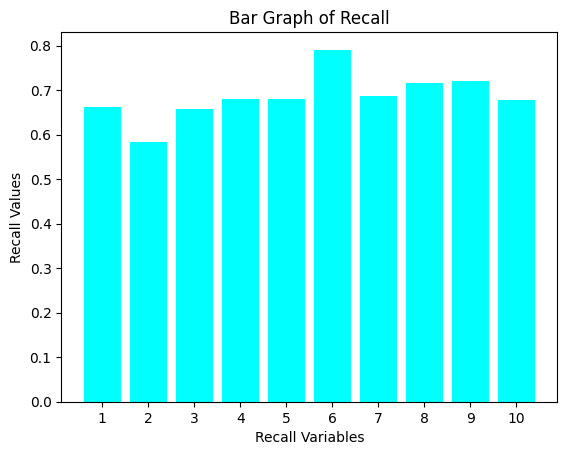

In [87]:
import matplotlib.pyplot as plt

# Assuming you have a list of recall values from recall1 to recall10
recall_values = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

# List of corresponding labels for each recall value
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting the bar graph
plt.bar(labels, recall_values, color='cyan')
plt.xlabel('Recall Variables')
plt.ylabel('Recall Values')
plt.title('Bar Graph of Recall')
plt.show()
